# 6. Cardiac Developmental Atlas Option

The Cardiac Developmental Atlas Option allows the user to predict the cell types in their own cardiac dataset based on the cardiac developmental atlas used in our paper (Galdos, Xu, et al. 2021). It can be accessed through the **`cardiacDevAtlas`** mode available in **predictOne** and **predictAll** `layerObjectPaths` argument. To use this option, the user should clone the entire devCellPy Github. This option will only run if the provided `Layer` objects are located in the current working directory with the path name `../devCellPy-main/cardiacdevatlas_objects/`.

## REQUIRED USER INPUTS:

- **runMode**: predictOne or predictAll
- **predNormExpr**: normalized expression matrix csv file
- **rejectionCutoff**: float between 0 and 1 denoting the minimum probability for a prediction to not be rejected
- **timePoint**: float between 7.5 and 14
    - Timepoints present within the cardiac developmental atlas include the following:
        - E7.75
        - E8.25
        - E9.25
        - E10.5
        - E13.5
    - Any timepoint between E7.5 and E14 is rounded to the nearest timepoint in the selection above.

##### EXAMPLES: 
`devcellpy --runMode predictOne --rejectionCutoff 0.5 --predNormExpr /devcellpy_example/cardiac_normalized.csv --predMetadata /devcellpy_example/cardiac_metadata.csv --layerObjectPaths cardiacDevAtlas --timePoint 13`

`devcellpy --runMode predictOne --rejectionCutoff 0.5 --predNormExpr /devcellpy_example/cardiac_normalized.csv --layerObjectPaths cardiacDevAtlas --timePoint 13`

`devcellpy --runMode predictAll --rejectionCutoff 0.5 --predNormExpr /devcellpy_example/cardiac_normalized.csv --layerObjectPaths cardiacDevAtlas --timePoint 13`


## Analysis of cardiacDevAtlas option in R

The following example uses the **predictAll** devCellPy option with **`cardiacDevAtlas`** in the `layerObjectPaths` argument. The query dataset in this example is the dataset (Galdos, Xu, et al. 2021) using mouse E10.5 hearts that were collected in this manuscript. 

In [ ]:
##R-analysis
library(Seurat)
library(dplyr)

# Import Predictions Made by devCellPy into R as a Dataframe
numcols = max(count.fields("~/Downloads/predictionall_reject0.5.csv", sep = ','))

prediction = read.table("~/Downloads/predictionall_reject0.5.csv", header = FALSE, sep = ",", 
                        col.names = paste0("V",seq_len(numcols)), fill = TRUE)

devcellpy_preds = data.frame(prediction)

# Relabel Columns of Prediction Table

colnames(devcellpy_preds) = c("cell_barcodes","Celltype1", "Celltype2", "Celltype3")

# Set Row names to Cell Barcodes

rownames(devcellpy_preds) = devcellpy_preds$cell_barcodes

#replace blanks in dataframe with <NA>
devcellpy_preds1 = devcellpy_preds
devcellpy_preds1[devcellpy_preds1 == ""] <- NA 

#load Seurat Object of Interest
galdos = readRDS("~/Downloads/galdos_final.object.rds")

#add Celltype1_pred, Celltype2_pred, etc. metadata slots to the Seurat Object

galdos[["Celltype1_pred_50"]] <- devcellpy_preds1$Celltype1
galdos[["Celltype2_pred_50"]] <- devcellpy_preds1$Celltype2
galdos[["Celltype3_pred_50"]] <- devcellpy_preds1$Celltype3

In [ ]:
p1 = DimPlot(galdos, group.by="Celltype1_pred_50", reduction = "umap", pt.size = 0.5) 
p1 = DimPlot(galdos, group.by="Celltype1_pred_80", reduction = "umap", pt.size = 0.5) 
p1 + p2

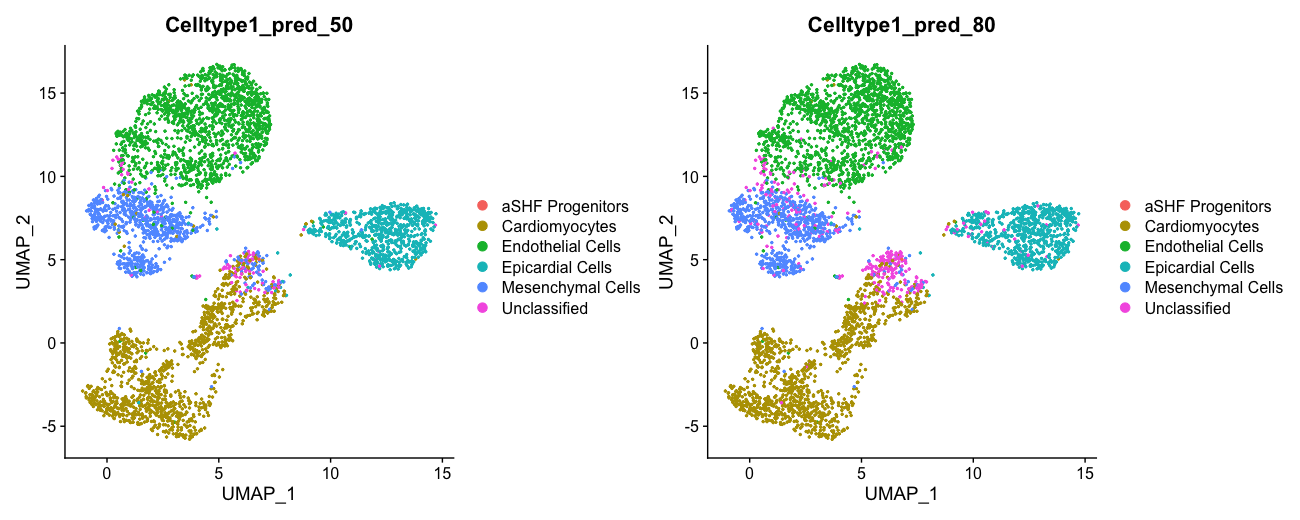

In [ ]:
p1 = DimPlot(galdos, group.by="Celltype2_pred_50", reduction = "umap", pt.size = 0.5) 
p1 = DimPlot(galdos, group.by="Celltype2_pred_80", reduction = "umap", pt.size = 0.5) 
p1 + p2

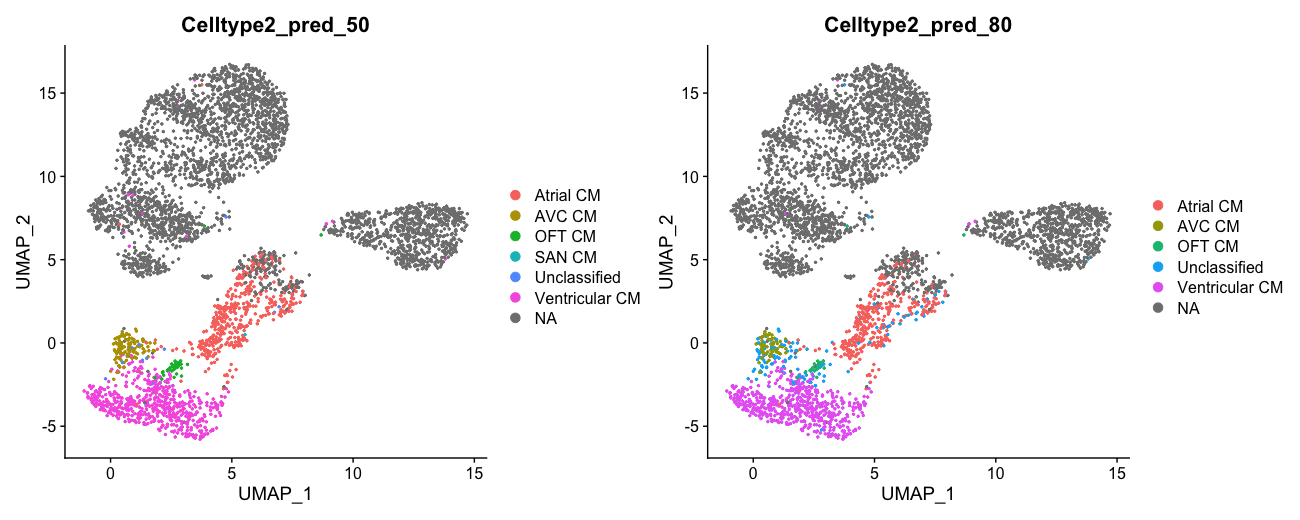

In [ ]:
p1 = DimPlot(galdos, group.by="Celltype3_pred_50", reduction = "umap", pt.size = 0.5) 
p1 = DimPlot(galdos, group.by="Celltype3_pred_80", reduction = "umap", pt.size = 0.5) 
p1 + p2

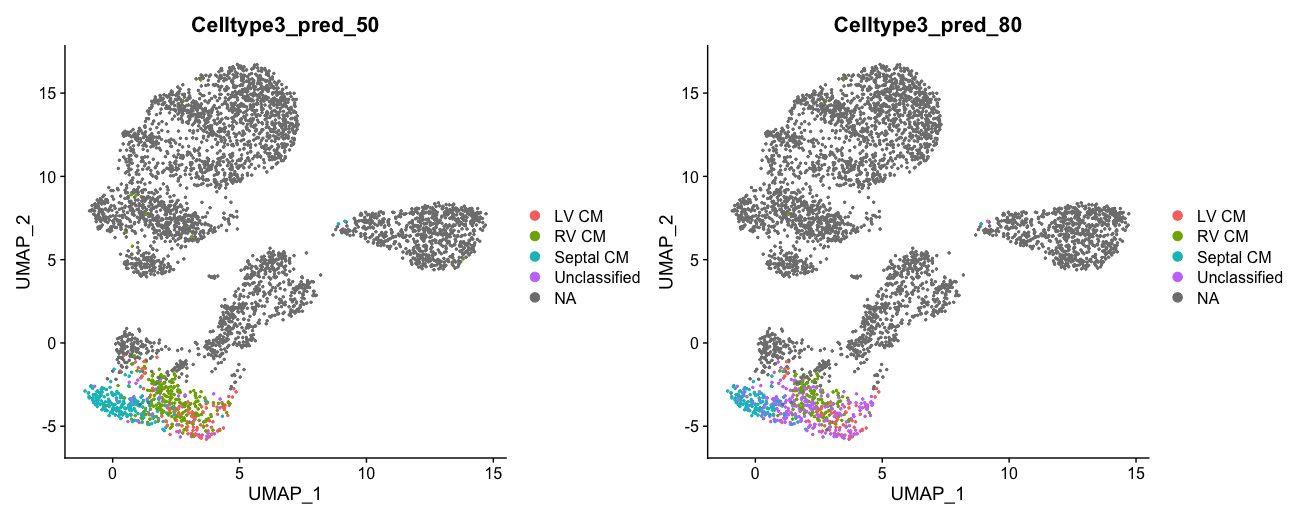

# Back to Table of Contents

[Table of Contents](https://github.com/devCellPy-Team/devCellPy/blob/main/Tutorial/0.tableofcontents.ipynb)